In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

COMPANY 1:-

In [2]:
df = pd.read_csv('/content/Company 1.csv')
df

,Day,Time,Weather,Traffic,Quantity,Prize
0,Sunday,8,Good,Yes,1,2700
1,Sunday,9,Good,No,3,2300
2,Sunday,10,Worst,Yes,6,4600
3,Sunday,11,Worst,No,4,4370
4,Sunday,12,Better,Yes,3,3980
...,...,...,...,...,...,...
72,Saturday,14,Better,Yes,2,3640
73,Saturday,15,Worst,Yes,5,4650
74,Saturday,16,Good,No,1,2370
75,Saturday,17,Good,No,6,2350


Let's look at the attributes of the dataset

In [3]:
df.shape

(77, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       77 non-null     object
 1   Time      77 non-null     int64 
 2   Weather   77 non-null     object
 3   Traffic   77 non-null     object
 4   Quantity  77 non-null     int64 
 5   Prize     77 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.7+ KB


In [5]:
#checking for null values
df.isnull().sum()

Day         0
Time        0
Weather     0
Traffic     0
Quantity    0
Prize       0
dtype: int64

In [6]:
df.head()

,Day,Time,Weather,Traffic,Quantity,Prize
0,Sunday,8,Good,Yes,1,2700
1,Sunday,9,Good,No,3,2300
2,Sunday,10,Worst,Yes,6,4600
3,Sunday,11,Worst,No,4,4370
4,Sunday,12,Better,Yes,3,3980


In [7]:
df.tail()

,Day,Time,Weather,Traffic,Quantity,Prize
72,Saturday,14,Better,Yes,2,3640
73,Saturday,15,Worst,Yes,5,4650
74,Saturday,16,Good,No,1,2370
75,Saturday,17,Good,No,6,2350
76,Saturday,18,Better,Yes,3,3637


In [8]:
df['Day'].value_counts()

Sunday       11
Monday       11
Tuesday      11
Wednesday    11
Thursday     11
Friday       11
Saturday     11
Name: Day, dtype: int64

In [9]:
df.rename(columns = {'Prize':'Price'},inplace = True)
df.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,Yes,1,2700
1,Sunday,9,Good,No,3,2300
2,Sunday,10,Worst,Yes,6,4600
3,Sunday,11,Worst,No,4,4370
4,Sunday,12,Better,Yes,3,3980


DATA ANALYSIS

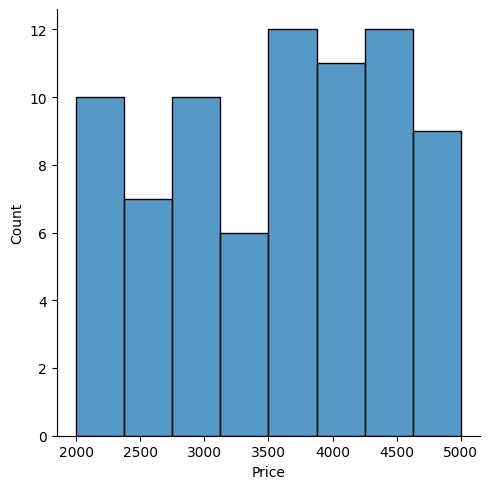

In [10]:
sns.displot(df['Price'])
plt.show()

By the price graph we can observe that the bar is in peak when the price range is in between 3.5k-4.0k & 4.3k-4.5k. So during Better-Yes && Worst-No weather-traffic conditions the market value will increase, the transport agency will be in profit in this time...

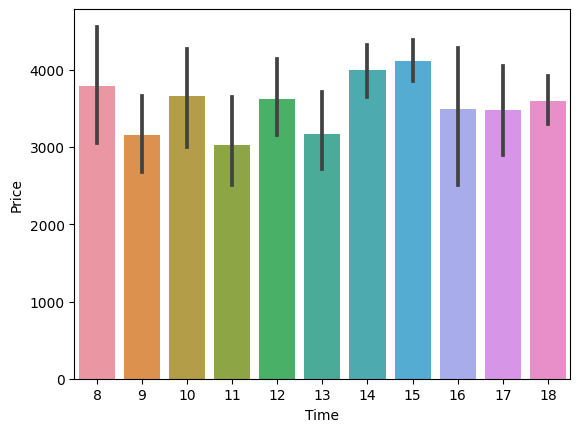

In [11]:
sns.barplot(x=df['Time'],y=df['Price'],data=df)
plt.show()

By the above graph we can observe that how price range varies during particular time...


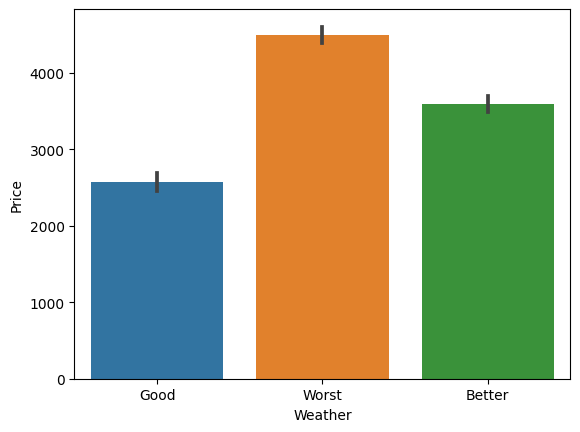

In [12]:
sns.barplot(x=df['Weather'],y=df['Price'],data=df)
plt.show()

By the above graph we can observe that how price range varies on weather conditions
[The price of goods will increase as weather conditions become worse].....

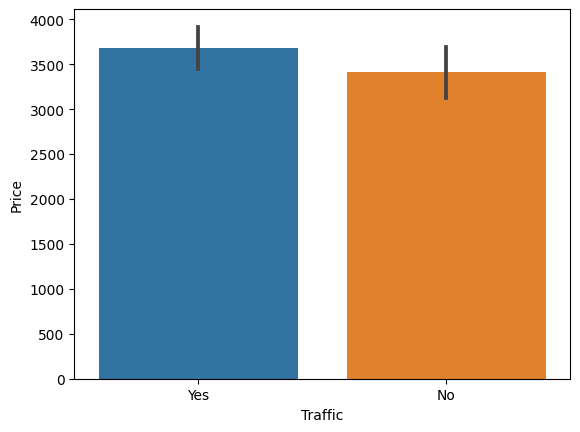

In [13]:
sns.barplot(x=df['Traffic'],y=df['Price'],data=df)
plt.show()

By the above graph we can observe that how price range varies on traffic conditions[Price will increase as traffic increases]...

In [14]:
#EDA(Exploratory data analysis) Distribution
coRel = df.corr()
coRel

,Time,Quantity,Price
Time,1.000000,0.047607,0.083489
Quantity,0.047607,1.000000,0.240432
Price,0.083489,0.240432,1.000000


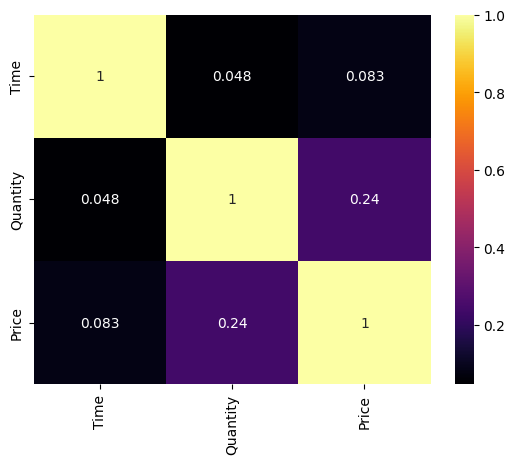

In [15]:
sns.heatmap(coRel,annot=True,cmap='inferno')
plt.xticks(rotation = 'vertical')
plt.show()

Converting Strings to numerical values->

In [16]:

day_mapping = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df['Day'] = df['Day'].map(day_mapping)
df

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,Yes,1,2700
1,1,9,Good,No,3,2300
2,1,10,Worst,Yes,6,4600
3,1,11,Worst,No,4,4370
4,1,12,Better,Yes,3,3980
...,...,...,...,...,...,...
72,7,14,Better,Yes,2,3640
73,7,15,Worst,Yes,5,4650
74,7,16,Good,No,1,2370
75,7,17,Good,No,6,2350


In [17]:
df.tail()

,Day,Time,Weather,Traffic,Quantity,Price
72,7,14,Better,Yes,2,3640
73,7,15,Worst,Yes,5,4650
74,7,16,Good,No,1,2370
75,7,17,Good,No,6,2350
76,7,18,Better,Yes,3,3637


In [18]:
weather_mapping = {'Good':1, 'Better':2, 'Worst':3}
df['Weather'] = df['Weather'].map(weather_mapping)
df.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,Yes,1,2700
1,1,9,1,No,3,2300
2,1,10,3,Yes,6,4600
3,1,11,3,No,4,4370
4,1,12,2,Yes,3,3980


In [19]:
traffic_mapping = {'Yes':1, 'No':0}
df['Traffic'] = df['Traffic'].map(traffic_mapping)
df.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,1,2700
1,1,9,1,0,3,2300
2,1,10,3,1,6,4600
3,1,11,3,0,4,4370
4,1,12,2,1,3,3980


In [20]:
df

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,1,2700
1,1,9,1,0,3,2300
2,1,10,3,1,6,4600
3,1,11,3,0,4,4370
4,1,12,2,1,3,3980
...,...,...,...,...,...,...
72,7,14,2,1,2,3640
73,7,15,3,1,5,4650
74,7,16,1,0,1,2370
75,7,17,1,0,6,2350


Now our DataSet is ready for model training...

Linear Regression Model:-

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
x = df.iloc[:,:5].values
y = df["Quantity"].values
y

array([1, 3, 6, 4, 3, 2, 5, 2, 6, 4, 3, 5, 5, 4, 3, 6, 1, 2, 5, 4, 2, 6,
       4, 3, 5, 1, 6, 2, 4, 5, 5, 3, 3, 5, 4, 2, 2, 3, 1, 6, 5, 4, 3, 5,
       3, 3, 4, 5, 1, 2, 6, 6, 5, 1, 3, 5, 6, 1, 3, 5, 2, 1, 3, 6, 4, 3,
       5, 1, 3, 2, 5, 1, 2, 5, 1, 6, 3])

In [23]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=0)
print(x_train.shape)
print(x_test.shape)

(15, 5)
(62, 5)


In [24]:
#call the algorithm
model11 = LinearRegression()
model11.fit(x_train,y_train)
y_pred11 = model11.predict(x_test)
y_pred11

array([1., 1., 5., 3., 4., 6., 3., 5., 3., 2., 2., 2., 4., 3., 5., 2., 4.,
       4., 6., 1., 1., 1., 3., 6., 2., 5., 5., 5., 3., 5., 2., 6., 4., 5.,
       3., 3., 3., 5., 1., 3., 3., 5., 3., 3., 4., 5., 6., 2., 5., 1., 6.,
       6., 2., 5., 1., 6., 2., 1., 6., 4., 1., 3.])

In [25]:
from sklearn.metrics import r2_score 
#co-efficieant of determination, regression score function
r2_score(y_test,y_pred11)

1.0

In [26]:
x = df.iloc[:,:5].values
y = df['Price'].values
y

array([2700, 2300, 4600, 4370, 3980, 2800, 4250, 3690, 4400, 4150, 4350,
       5000, 3740, 3330, 2870, 4950, 2260, 4010, 4260, 4800, 3700, 3970,
       4970, 2700, 2900, 3000, 2650, 3410, 3100, 3550, 4450, 2740, 3000,
       3200, 3770, 2300, 2170, 3500, 4300, 4400, 3990, 2000, 2860, 3150,
       4830, 2780, 3333, 2300, 3960, 2660, 4700, 4200, 2100, 3850, 3510,
       3500, 4200, 4800, 2510, 3250, 2900, 3900, 4490, 4320, 4750, 3600,
       2350, 2600, 4350, 4000, 3100, 3880, 3640, 4650, 2370, 2350, 3637])

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=0)
print(x_train.shape)
print(x_test.shape)

(15, 5)
(62, 5)


In [28]:
#call the algorithm
model12 = LinearRegression()
model12.fit(x_train,y_train)
y_pred12 = model12.predict(x_test)
y_pred12


array([3520.90123853, 1969.12243889, 3311.57324373, 3605.11802704,
       3780.74828292, 2904.3009956 , 4177.28241681, 3363.85468192,
       2704.21814614, 3596.63310863, 3091.86039019, 2582.27846152,
       4268.85398309, 2622.9777227 , 3256.47353939, 3581.66759513,
       4793.69379695, 2206.08412169, 4868.58160429, 4010.41607177,
       3494.76051944, 3467.21066726, 4128.25633613, 4415.65323269,
       3564.41876587, 4310.96237734, 2275.74236812, 2309.36584396,
       3688.20467491, 4280.15716766, 2586.94295211, 4930.19202365,
       3229.76774997, 4872.68102455, 2713.54712731, 4119.3644463 ,
       2627.64221328, 3790.64233442, 4535.25588563, 2220.92165621,
       2616.90409903, 2352.31830098, 2696.73538939, 3595.78904587,
       4712.45337351, 3795.30682501, 4340.48643292, 2121.86733318,
       4295.5597725 , 2584.9687487 , 2329.99800971, 4904.05130455,
       2605.60091445, 3354.52570075, 2024.65923458, 4355.88903776,
       3555.52687604, 3500.8341431 , 4363.80888585, 3277.38469

In [29]:
r2_score(y_test,y_pred12)

0.9187314211563133

In [30]:
df12 = pd.DataFrame({'Predicted':y_pred12, 'Actual':y_test})
df12

,Predicted,Actual
0,3520.901239,3960
1,1969.122439,2370
2,3311.573244,3250
3,3605.118027,3510
4,3780.748283,3770
...,...,...
57,3500.834143,3880
58,4363.808886,4400
59,3277.384698,3330
60,3039.013882,3000


Company 2

In [31]:
df2 = pd.read_csv('/content/Company 2.csv')
df2

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,1,5,2700
1,Sunday,9,Good,0,1,2400
2,Sunday,10,Worst,1,2,4700
3,Sunday,11,Worst,0,6,4300
4,Sunday,12,Better,1,3,3500
...,...,...,...,...,...,...
72,Saturday,14,Better,1,6,3678
73,Saturday,15,Worst,1,4,4895
74,Saturday,16,Good,0,2,2500
75,Saturday,17,Good,0,3,2500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Day       77 non-null     int64
 1   Time      77 non-null     int64
 2   Weather   77 non-null     int64
 3   Traffic   77 non-null     int64
 4   Quantity  77 non-null     int64
 5   Price     77 non-null     int64
dtypes: int64(6)
memory usage: 3.7 KB


Converting Strings to numerical values->

In [33]:
day_mapping2 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df2['Day'] = df2['Day'].map(day_mapping2)
df2

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,1,5,2700
1,1,9,Good,0,1,2400
2,1,10,Worst,1,2,4700
3,1,11,Worst,0,6,4300
4,1,12,Better,1,3,3500
...,...,...,...,...,...,...
72,7,14,Better,1,6,3678
73,7,15,Worst,1,4,4895
74,7,16,Good,0,2,2500
75,7,17,Good,0,3,2500


In [34]:
weather_mapping2 = {'Good':1, 'Better':2, 'Worst':3}
df2['Weather'] = df2['Weather'].map(weather_mapping2)
df2.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,5,2700
1,1,9,1,0,1,2400
2,1,10,3,1,2,4700
3,1,11,3,0,6,4300
4,1,12,2,1,3,3500


In [35]:
df2

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,5,2700
1,1,9,1,0,1,2400
2,1,10,3,1,2,4700
3,1,11,3,0,6,4300
4,1,12,2,1,3,3500
...,...,...,...,...,...,...
72,7,14,2,1,6,3678
73,7,15,3,1,4,4895
74,7,16,1,0,2,2500
75,7,17,1,0,3,2500


Now our DataSet is ready for model training...



Linear Regression Model:-

In [36]:
x2 = df.iloc[:,:5].values
y2 = df["Quantity"].values
y2


array([1, 3, 6, 4, 3, 2, 5, 2, 6, 4, 3, 5, 5, 4, 3, 6, 1, 2, 5, 4, 2, 6,
       4, 3, 5, 1, 6, 2, 4, 5, 5, 3, 3, 5, 4, 2, 2, 3, 1, 6, 5, 4, 3, 5,
       3, 3, 4, 5, 1, 2, 6, 6, 5, 1, 3, 5, 6, 1, 3, 5, 2, 1, 3, 6, 4, 3,
       5, 1, 3, 2, 5, 1, 2, 5, 1, 6, 3])

In [37]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.8,random_state=0)
print(x_train2.shape)
print(x_test2.shape)

(15, 5)
(62, 5)


In [38]:
#call the algorithm
model21 = LinearRegression()
model21.fit(x_train2,y_train2)
y_pred21 = model21.predict(x_test2)
y_pred21

array([1., 1., 5., 3., 4., 6., 3., 5., 3., 2., 2., 2., 4., 3., 5., 2., 4.,
       4., 6., 1., 1., 1., 3., 6., 2., 5., 5., 5., 3., 5., 2., 6., 4., 5.,
       3., 3., 3., 5., 1., 3., 3., 5., 3., 3., 4., 5., 6., 2., 5., 1., 6.,
       6., 2., 5., 1., 6., 2., 1., 6., 4., 1., 3.])

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred21)

1.0

In [40]:
x2 = df.iloc[:,:5].values
y2= df['Price'].values
y2

array([2700, 2300, 4600, 4370, 3980, 2800, 4250, 3690, 4400, 4150, 4350,
       5000, 3740, 3330, 2870, 4950, 2260, 4010, 4260, 4800, 3700, 3970,
       4970, 2700, 2900, 3000, 2650, 3410, 3100, 3550, 4450, 2740, 3000,
       3200, 3770, 2300, 2170, 3500, 4300, 4400, 3990, 2000, 2860, 3150,
       4830, 2780, 3333, 2300, 3960, 2660, 4700, 4200, 2100, 3850, 3510,
       3500, 4200, 4800, 2510, 3250, 2900, 3900, 4490, 4320, 4750, 3600,
       2350, 2600, 4350, 4000, 3100, 3880, 3640, 4650, 2370, 2350, 3637])

In [41]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.8,random_state=0)
print(x_train2.shape)
print(x_test2.shape)

(15, 5)
(62, 5)


In [42]:
#call the algorithm
model22 = LinearRegression()
model22.fit(x_train2,y_train2)
y_pred22 = model22.predict(x_test2)
y_pred22


array([3520.90123853, 1969.12243889, 3311.57324373, 3605.11802704,
       3780.74828292, 2904.3009956 , 4177.28241681, 3363.85468192,
       2704.21814614, 3596.63310863, 3091.86039019, 2582.27846152,
       4268.85398309, 2622.9777227 , 3256.47353939, 3581.66759513,
       4793.69379695, 2206.08412169, 4868.58160429, 4010.41607177,
       3494.76051944, 3467.21066726, 4128.25633613, 4415.65323269,
       3564.41876587, 4310.96237734, 2275.74236812, 2309.36584396,
       3688.20467491, 4280.15716766, 2586.94295211, 4930.19202365,
       3229.76774997, 4872.68102455, 2713.54712731, 4119.3644463 ,
       2627.64221328, 3790.64233442, 4535.25588563, 2220.92165621,
       2616.90409903, 2352.31830098, 2696.73538939, 3595.78904587,
       4712.45337351, 3795.30682501, 4340.48643292, 2121.86733318,
       4295.5597725 , 2584.9687487 , 2329.99800971, 4904.05130455,
       2605.60091445, 3354.52570075, 2024.65923458, 4355.88903776,
       3555.52687604, 3500.8341431 , 4363.80888585, 3277.38469

In [43]:
r2_score(y_test2,y_pred22)

0.9187314211563133

In [44]:
df22 = pd.DataFrame({'Predicted':y_pred22, 'Actual':y_test2})
df22

,Predicted,Actual
0,3520.901239,3960
1,1969.122439,2370
2,3311.573244,3250
3,3605.118027,3510
4,3780.748283,3770
...,...,...
57,3500.834143,3880
58,4363.808886,4400
59,3277.384698,3330
60,3039.013882,3000


Company 3

In [45]:
df3 = pd.read_csv('/content/company 3.csv')
df3

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,1,5,2815
1,Sunday,9,Good,0,6,2100
2,Sunday,10,Worst,1,2,4650
3,Sunday,11,Worst,0,4,4500
4,Sunday,12,Better,1,5,3609
...,...,...,...,...,...,...
72,Saturday,14,Better,1,4,3800
73,Saturday,15,Worst,1,5,5000
74,Saturday,16,Good,0,2,2500
75,Saturday,17,Good,0,3,2500


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       77 non-null     object
 1   Time      77 non-null     int64 
 2   Weather   77 non-null     object
 3   Traffic   77 non-null     int64 
 4   Quantity  77 non-null     int64 
 5   Price     77 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.7+ KB


Converting Strings to numerical values->



In [47]:
day_mapping3 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df3['Day'] = df3['Day'].map(day_mapping3)
df3

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,1,5,2815
1,1,9,Good,0,6,2100
2,1,10,Worst,1,2,4650
3,1,11,Worst,0,4,4500
4,1,12,Better,1,5,3609
...,...,...,...,...,...,...
72,7,14,Better,1,4,3800
73,7,15,Worst,1,5,5000
74,7,16,Good,0,2,2500
75,7,17,Good,0,3,2500


In [48]:
weather_mapping3 = {'Good':1, 'Better':2, 'Worst':3}
df3['Weather'] = df3['Weather'].map(weather_mapping3)
df3.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,5,2815
1,1,9,1,0,6,2100
2,1,10,3,1,2,4650
3,1,11,3,0,4,4500
4,1,12,2,1,5,3609


In [49]:
df3

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,5,2815
1,1,9,1,0,6,2100
2,1,10,3,1,2,4650
3,1,11,3,0,4,4500
4,1,12,2,1,5,3609
...,...,...,...,...,...,...
72,7,14,2,1,4,3800
73,7,15,3,1,5,5000
74,7,16,1,0,2,2500
75,7,17,1,0,3,2500


Now our DataSet is ready for model training...

LinearRegression model:-

In [50]:
x3 = df3.iloc[:,:5].values
y3 = df3['Quantity'].values
y3

array([5, 6, 2, 4, 5, 1, 2, 3, 5, 4, 6, 5, 6, 2, 4, 5, 1, 2, 3, 5, 4, 6,
       1, 3, 5, 4, 6, 2, 4, 6, 5, 1, 2, 5, 6, 1, 4, 3, 2, 4, 5, 2, 1, 4,
       6, 3, 5, 1, 2, 3, 4, 5, 6, 3, 5, 6, 1, 2, 4, 5, 6, 5, 4, 3, 2, 1,
       1, 2, 5, 3, 5, 6, 4, 5, 2, 3, 6])

In [51]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.8,random_state=0)
print(x_train3.shape)
print(x_test3.shape)


(15, 5)
(62, 5)


In [52]:
#call the algorithm
model31 = LinearRegression()
model31.fit(x_train3,y_train3)
y_pred31 = model31.predict(x_test3)
y_pred31


array([2., 2., 5., 5., 6., 6., 5., 5., 3., 3., 2., 6., 4., 1., 4., 3., 1.,
       2., 4., 2., 5., 3., 4., 1., 4., 2., 6., 5., 5., 5., 3., 2., 4., 5.,
       3., 6., 1., 5., 2., 6., 2., 1., 4., 6., 5., 6., 3., 1., 3., 5., 3.,
       5., 1., 6., 1., 5., 4., 6., 5., 2., 4., 3.])

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred31)

1.0

In [54]:
x3 = df3.iloc[:,:5].values
y3 = df3['Price'].values
y3

array([2815, 2100, 4650, 4500, 3609, 2895, 4300, 3900, 4450, 4350, 4210,
       2899, 2200, 4560, 4500, 3600, 2805, 4000, 3650, 4000, 4350, 4300,
       5000, 2950, 2950, 3300, 2755, 2350, 3100, 4000, 4230, 2800, 2855,
       3400, 3900, 2000, 2100, 3950, 4100, 4500, 3600, 2500, 3000, 3400,
       5000, 2850, 3400, 2450, 4000, 2106, 4700, 4399, 2400, 4000, 4000,
       3500, 4400, 4800, 2800, 3250, 2900, 3500, 4000, 4500, 5000, 3999,
       2100, 2800, 4300, 3850, 2500, 3900, 3800, 5000, 2500, 2500, 4000])

In [55]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.8,random_state=0)
print(x_train3.shape)
print(x_test3.shape)

(15, 5)
(62, 5)


In [56]:
#call the algorithm
model32 = LinearRegression()
model32.fit(x_train3,y_train3)
y_pred32 = model32.predict(x_test3)
y_pred32


array([3877.21936564, 2381.97862182, 3398.68414314, 3976.70895647,
       3888.3311099 , 2843.93088898, 4450.81088383, 3294.67941201,
       2840.71950949, 3960.30165529, 2212.60175845, 2961.30538679,
       4221.53129012, 2830.56202687, 3354.23445235, 3771.9117783 ,
       4786.53493134, 2272.33064378, 4959.12317421, 4311.21199291,
       3982.35220339, 3933.5621219 , 4435.18399928, 4335.69440845,
       4001.19137201, 4209.29053464, 2379.72059939, 2404.20301492,
       3784.15253378, 4350.97269842, 2303.41056787, 4746.59947626,
       3286.77904724, 2758.76532647, 2767.62085746, 4311.03724333,
       2794.01270085, 3916.98007114, 4929.34610633, 2179.43765692,
       2819.44937802, 2302.45630623, 4258.08061613, 4067.5177659 ,
       4314.4233724 , 3898.14090252, 4425.20036166, 2208.26136774,
       3808.46110431, 2722.21600046, 2407.415299  , 3820.70185979,
       2690.00796973, 3385.48822144, 2726.55729574, 4416.34483067,
       4304.43973478, 4028.88516703, 4277.87404639, 4783.14880

In [57]:
r2_score(y_test3,y_pred32)

0.9537710936467586

In [58]:
df32 = pd.DataFrame({'Predicted':y_pred32, 'Actual':y_test3})
df32

,Predicted,Actual
0,3877.219366,4000
1,2381.978622,2500
2,3398.684143,3250
3,3976.708956,4000
4,3888.331110,3900
...,...,...
57,4028.885167,3900
58,4277.874046,4450
59,4783.148802,4560
60,3263.599488,3300


Company 4

In [59]:
df4 = pd.read_csv('/content/Company 4.csv')
df4

,Day,Time,Weather,Traffic,Quantity,Prize
0,Sunday,8,Good,1,5,2700
1,Sunday,9,Good,0,2,2371
2,Sunday,10,Worst,1,4,4650
3,Sunday,11,Worst,0,6,4120
4,Sunday,12,Better,1,3,3650
...,...,...,...,...,...,...
72,Saturday,14,Better,1,3,3570
73,Saturday,15,Worst,1,4,4627
74,Saturday,16,Good,0,5,2500
75,Saturday,17,Good,0,6,2300


In [60]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       77 non-null     object
 1   Time      77 non-null     int64 
 2   Weather   77 non-null     object
 3   Traffic   77 non-null     int64 
 4   Quantity  77 non-null     int64 
 5   Prize     77 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.7+ KB


In [61]:
df4.rename(columns = {'Prize':'Price'},inplace = True)
df4.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,1,5,2700
1,Sunday,9,Good,0,2,2371
2,Sunday,10,Worst,1,4,4650
3,Sunday,11,Worst,0,6,4120
4,Sunday,12,Better,1,3,3650


Converting Strings to numerical values->

In [62]:
day_mapping4 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df4['Day'] = df4['Day'].map(day_mapping4)
df4

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,1,5,2700
1,1,9,Good,0,2,2371
2,1,10,Worst,1,4,4650
3,1,11,Worst,0,6,4120
4,1,12,Better,1,3,3650
...,...,...,...,...,...,...
72,7,14,Better,1,3,3570
73,7,15,Worst,1,4,4627
74,7,16,Good,0,5,2500
75,7,17,Good,0,6,2300


In [63]:
weather_mapping4 = {'Good':1, 'Better':2, 'Worst':3}
df4['Weather'] = df4['Weather'].map(weather_mapping4)
df4.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,5,2700
1,1,9,1,0,2,2371
2,1,10,3,1,4,4650
3,1,11,3,0,6,4120
4,1,12,2,1,3,3650


In [64]:
df4

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,5,2700
1,1,9,1,0,2,2371
2,1,10,3,1,4,4650
3,1,11,3,0,6,4120
4,1,12,2,1,3,3650
...,...,...,...,...,...,...
72,7,14,2,1,3,3570
73,7,15,3,1,4,4627
74,7,16,1,0,5,2500
75,7,17,1,0,6,2300


Now our DataSet is ready for model training...

LinearRegression model:-

In [65]:
x4 = df4.iloc[:,:5].values
y4 = df4['Quantity'].values
y4

array([5, 2, 4, 6, 3, 5, 4, 2, 5, 6, 1, 2, 5, 6, 3, 4, 5, 2, 1, 5, 6, 3,
       2, 4, 2, 1, 4, 3, 6, 1, 5, 2, 4, 3, 2, 6, 1, 5, 4, 3, 4, 2, 6, 5,
       1, 5, 3, 5, 4, 6, 5, 6, 6, 6, 3, 4, 2, 5, 1, 1, 2, 3, 6, 1, 4, 5,
       2, 6, 6, 4, 5, 2, 3, 4, 5, 6, 1])

In [66]:
from sklearn.model_selection import train_test_split
x_train4,x_test4,y_train4,y_test4 = train_test_split(x4,y4,test_size=0.8,random_state=0)
print(x_train4.shape)
print(x_test4.shape)

(15, 5)
(62, 5)


In [67]:
#call the algorithm
model41 = LinearRegression()
model41.fit(x_train4,y_train4)
y_pred41 = model41.predict(x_test4)
y_pred41


array([4., 5., 1., 3., 2., 4., 6., 3., 5., 4., 3., 2., 6., 6., 5., 2., 2.,
       2., 5., 4., 3., 6., 6., 2., 3., 4., 6., 5., 3., 5., 6., 4., 6., 2.,
       4., 1., 2., 4., 5., 2., 4., 2., 3., 1., 5., 1., 1., 6., 1., 5., 6.,
       4., 5., 4., 5., 6., 6., 2., 5., 6., 1., 5.])

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred41)

1.0

In [69]:
x4 = df4.iloc[:,:5].values
y4 = df4['Price'].values
y4

array([2700, 2371, 4650, 4120, 3650, 2650, 4300, 3751, 4250, 4271, 4440,
       4555, 3860, 3320, 2600, 4800, 2300, 4350, 4470, 4860, 3650, 3800,
       4777, 2650, 2700, 3400, 2600, 3156, 3400, 3650, 4000, 2700, 2950,
       3450, 3550, 2100, 2300, 3520, 4100, 4120, 3850, 2400, 2750, 3500,
       4650, 2860, 3300, 2430, 3650, 2600, 4860, 4100, 2400, 3550, 3980,
       3350, 4200, 4520, 2500, 3500, 3000, 3890, 4200, 4300, 4600, 3650,
       2000, 2650, 4200, 3650, 2650, 3700, 3570, 4627, 2500, 2300, 3657])

In [70]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(x4,y4,test_size=0.8,random_state=0)
print(x_train4.shape)
print(x_test4.shape)

(15, 5)
(62, 5)


In [71]:
#call the algorithm
model42 = LinearRegression()
model42.fit(x_train4,y_train4)
y_pred42 = model42.predict(x_test4)
y_pred42

array([3810.00367179, 2111.90317609, 2951.91077803, 3303.09738086,
       3872.26190787, 3056.01289152, 4497.29617547, 3626.472184  ,
       3180.9777023 , 3690.31406657, 2452.0402731 , 2485.51410477,
       4987.49092859, 2862.62871798, 3197.89945378, 3756.76295642,
       4969.6945178 , 2049.19660138, 4731.6495671 , 4351.42917311,
       3472.72296881, 3709.24578523, 4262.10761879, 4201.37151699,
       3380.09668183, 4563.74506531, 2410.68422859, 2374.15505101,
       4066.98034115, 4360.89503245, 2607.37313478, 5250.87811138,
       3666.30609423, 3183.83409633, 3252.70179771, 3960.90775476,
       2501.14109078, 3705.94105258, 4901.27515504, 2786.01624343,
       2662.63507914, 2295.8214903 , 4554.27920598, 2890.78784982,
       4453.52131942, 3457.98190392, 3628.90225734, 2896.68832795,
       3550.60819089, 3617.04581894, 2159.8686859 , 4087.88253272,
       3289.23097529, 3554.74808859, 3196.60468831, 4354.73390577,
       4501.48682924, 3332.13117202, 4546.1476064 , 5385.30878

In [72]:
r2_score(y_test4,y_pred42)

0.4029312378811849

In [73]:
df42 = pd.DataFrame({'Predicted':y_pred42, 'Actual':y_test4})
df42

,Predicted,Actual
0,3810.003672,3650
1,2111.903176,2500
2,2951.910778,3500
3,3303.097381,3980
4,3872.261908,3550
...,...,...
57,3332.131172,3700
58,4546.147606,4250
59,5385.308781,3320
60,3295.352608,3400


Comapny 5

In [74]:
df5 = pd.read_csv('/content/Company 5.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       77 non-null     object
 1   Time      77 non-null     int64 
 2   Weather   77 non-null     object
 3   Traffic   77 non-null     int64 
 4   Quantity  77 non-null     int64 
 5   Price     77 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.7+ KB


In [75]:
df5.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,1,6,2856
1,Sunday,9,Good,0,5,2450
2,Sunday,10,Worst,1,2,4895
3,Sunday,11,Worst,0,1,4420
4,Sunday,12,Better,1,5,3589


Converting String to Numerical value

In [76]:
day_mapping5 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df5['Day'] = df5['Day'].map(day_mapping5)
df5

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,1,6,2856
1,1,9,Good,0,5,2450
2,1,10,Worst,1,2,4895
3,1,11,Worst,0,1,4420
4,1,12,Better,1,5,3589
...,...,...,...,...,...,...
72,7,14,Better,1,6,3678
73,7,15,Worst,1,1,4895
74,7,16,Good,0,2,2500
75,7,17,Good,0,3,2500


In [77]:
weather_mapping5  = {'Good':1, 'Better':2, 'Worst':3}
df5['Weather'] = df5['Weather'].map(weather_mapping5)
df5.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,6,2856
1,1,9,1,0,5,2450
2,1,10,3,1,2,4895
3,1,11,3,0,1,4420
4,1,12,2,1,5,3589


In [78]:
x5 = df5.iloc[:,:5].values
y5 = df5['Quantity'].values
y5

array([6, 5, 2, 1, 5, 2, 3, 4, 4, 6, 2, 3, 5, 4, 6, 5, 3, 2, 4, 6, 2, 3,
       4, 2, 3, 2, 5, 6, 4, 6, 2, 3, 4, 3, 6, 1, 4, 3, 5, 2, 3, 5, 2, 1,
       6, 4, 6, 1, 6, 6, 4, 2, 3, 4, 2, 6, 3, 5, 4, 1, 4, 2, 3, 4, 6, 3,
       5, 2, 3, 6, 4, 5, 6, 1, 2, 3, 4])

In [79]:
from sklearn.model_selection import train_test_split
x_train5,x_test5,y_train5,y_test5 = train_test_split(x5,y5,test_size=0.8,random_state=0)
print(x_train5.shape)
print(x_test5.shape)

(15, 5)
(62, 5)


In [80]:
#call the algorithm
model51 = LinearRegression()
model51.fit(x_train5,y_train5)
y_pred51 = model51.predict(x_test5)
y_pred51


array([6., 2., 1., 2., 6., 5., 3., 3., 4., 6., 6., 4., 1., 2., 1., 4., 4.,
       5., 4., 5., 2., 4., 3., 3., 6., 3., 3., 4., 5., 2., 6., 2., 4., 3.,
       2., 2., 3., 3., 5., 5., 4., 5., 6., 4., 6., 6., 4., 1., 4., 6., 3.,
       5., 2., 6., 3., 2., 2., 5., 4., 4., 2., 3.])

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred51)

1.0

In [82]:
x5 = df5.iloc[:,:5].values
y5 = df5['Price'].values
y5

array([2856, 2450, 4895, 4420, 3589, 2598, 4500, 3598, 4400, 4325, 4125,
       4789, 3895, 3450, 2689, 4789, 2300, 4250, 4236, 4789, 3560, 3652,
       4895, 2756, 2789, 3400, 2856, 3456, 3400, 3895, 4256, 2896, 2800,
       3500, 3600, 2410, 2400, 3850, 4500, 4400, 2785, 2455, 2856, 3445,
       4789, 2850, 3500, 2440, 3895, 2410, 4795, 4350, 2321, 3756, 3954,
       3451, 4500, 5000, 2750, 3200, 2850, 3652, 4000, 4352, 4987, 3895,
       2450, 2895, 4325, 3895, 2451, 3895, 3678, 4895, 2500, 2500, 3965])

In [83]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(x5,y5,test_size=0.8,random_state=0)
print(x_train5.shape)
print(x_test5.shape)

(15, 5)
(62, 5)


In [84]:
#call the algorithm
model52 = LinearRegression()
model52.fit(x_train5,y_train5)
y_pred52 = model52.predict(x_test5)
y_pred52

array([4021.74051164, 2466.5376051 , 3369.01915822, 3614.73120424,
       4099.06298694, 3094.88784846, 4408.9042707 , 3595.08405683,
       3115.86845294, 4052.01414899, 2786.58269666, 3012.1290365 ,
       4246.66341063, 2778.35074545, 3206.66081518, 3810.52246551,
       4860.1668015 , 2647.13330621, 4705.5218509 , 4448.12223326,
       3722.3273169 , 3765.40197567, 4274.89121691, 4433.39286373,
       3972.76332558, 4291.66641751, 2524.80782403, 2696.45919994,
       3951.90020406, 4180.56231631, 2790.43939287, 4679.22239272,
       3496.78097705, 3074.37343461, 2987.75792643, 4123.87173782,
       2838.54931249, 3754.18059469, 4875.24487869, 2826.26684984,
       2874.2592865 , 2864.25387962, 4559.22633446, 3742.84173075,
       4427.14162878, 3938.63299201, 4310.60119092, 2557.12729245,
       3812.45081362, 3258.82583193, 2502.24757911, 3953.82855217,
       2878.23346567, 3785.32149848, 2942.28872893, 4210.83595366,
       4152.21702707, 3937.05335157, 4300.95945038, 4805.40457

In [85]:
r2_score(y_test5,y_pred52)

0.6532548208966906

Company 6

In [86]:
df6 = pd.read_csv('/content/company 6.csv')
df6

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,1,3,2810
1,Sunday,9,Good,0,6,2105
2,Sunday,10,Worst,1,4,4600
3,Sunday,11,Worst,0,2,4500
4,Sunday,12,Better,1,1,3600
...,...,...,...,...,...,...
72,Saturday,14,Better,1,1,3895
73,Saturday,15,Worst,1,3,5000
74,Saturday,16,Good,0,5,2500
75,Saturday,17,Good,0,4,2400


In [87]:
day_mapping6 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df6['Day'] = df6['Day'].map(day_mapping6)
df6

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,1,3,2810
1,1,9,Good,0,6,2105
2,1,10,Worst,1,4,4600
3,1,11,Worst,0,2,4500
4,1,12,Better,1,1,3600
...,...,...,...,...,...,...
72,7,14,Better,1,1,3895
73,7,15,Worst,1,3,5000
74,7,16,Good,0,5,2500
75,7,17,Good,0,4,2400


In [88]:
weather_mapping6 = {'Good':1, 'Better':2, 'Worst':3}
df6['Weather'] = df6['Weather'].map(weather_mapping6)
df6.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,3,2810
1,1,9,1,0,6,2105
2,1,10,3,1,4,4600
3,1,11,3,0,2,4500
4,1,12,2,1,1,3600


In [89]:
x6 = df6.iloc[:,:5].values
y6 = df6['Quantity'].values
y6

array([3, 6, 4, 2, 1, 2, 5, 6, 4, 3, 5, 6, 2, 1, 3, 5, 4, 6, 5, 1, 3, 4,
       5, 6, 2, 3, 6, 5, 4, 1, 5, 6, 4, 3, 2, 5, 3, 5, 1, 4, 6, 2, 5, 2,
       3, 4, 1, 6, 1, 5, 4, 3, 2, 6, 4, 1, 5, 3, 6, 5, 3, 4, 1, 6, 2, 5,
       6, 4, 3, 5, 6, 2, 1, 3, 5, 4, 6])

In [90]:
from sklearn.model_selection import train_test_split
x_train6,x_test6,y_train6,y_test6 = train_test_split(x6,y6,test_size=0.8,random_state=0)
print(x_train6.shape)
print(x_test6.shape)

(15, 5)
(62, 5)


In [91]:
#call the algorithm
model61 = LinearRegression()
model61.fit(x_train6,y_train6)
y_pred61 = model61.predict(x_test6)
y_pred61

array([1., 5., 5., 4., 2., 6., 3., 3., 4., 5., 5., 3., 2., 5., 2., 6., 5.,
       2., 4., 1., 4., 6., 1., 5., 1., 5., 2., 6., 1., 5., 5., 4., 4., 6.,
       6., 5., 6., 6., 3., 6., 4., 6., 3., 6., 1., 1., 6., 5., 5., 3., 4.,
       5., 2., 1., 4., 3., 3., 2., 4., 1., 3., 5.])

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred61)

1.0

In [93]:
x6 = df6.iloc[:,:5].values
y6 = df6['Price'].values
y6

array([2810, 2105, 4600, 4500, 3600, 2890, 4250, 3900, 4350, 4250, 4110,
       2800, 2100, 4560, 4500, 3600, 2805, 4000, 3650, 4000, 4350, 4300,
       5000, 2950, 2950, 3250, 2750, 2300, 3100, 4000, 4230, 2800, 2850,
       3400, 3900, 2000, 2100, 3950, 4100, 4500, 3600, 2500, 3000, 3400,
       5000, 2850, 3400, 2450, 4000, 2100, 4700, 4399, 2400, 4000, 4000,
       3500, 4350, 4800, 2800, 3200, 2900, 3500, 4000, 4500, 5000, 3999,
       2100, 2800, 4300, 3850, 2500, 3899, 3895, 5000, 2500, 2400, 3999])

In [94]:
x_train6,x_test6,y_train6,y_test6 = train_test_split(x6,y6,test_size=0.8,random_state=0)
print(x_train6.shape)
print(x_test6.shape)

(15, 5)
(62, 5)


In [95]:
#call the algorithm
model62 = LinearRegression()
model62.fit(x_train6,y_train6)
y_pred62 = model62.predict(x_test6)
y_pred62

array([3956.48107118, 2374.32990026, 3347.9064634 , 3926.42871902,
       3873.74481804, 2720.44413486, 4463.82238212, 3280.33663673,
       2833.86705207, 3951.96640734, 2181.77058103, 2922.38659289,
       4228.37551155, 2814.74696335, 3359.75353954, 3690.70134766,
       4799.919166  , 2307.6748863 , 4943.80764621, 4392.93320512,
       3947.09793238, 3877.47737921, 4492.10450857, 4371.06867826,
       4055.65237463, 4180.97329637, 2351.47725036, 2329.6127235 ,
       3781.27161498, 4280.14459982, 2269.37530913, 4745.46503931,
       3249.64997266, 2653.50862011, 2703.09427184, 4204.10644707,
       2749.36057323, 3822.10843982, 4986.06088563, 2049.44867617,
       2798.31191304, 2306.4795728 , 4250.59384954, 3970.86539499,
       4322.67834004, 3886.2262061 , 4389.96766591, 2208.22308206,
       3756.08773778, 2674.45833426, 2401.697214  , 3738.73787476,
       2724.9587987 , 3411.10941697, 2725.59311062, 4405.13409238,
       4285.29357558, 4028.28506089, 4214.12389779, 4854.01948

In [96]:
r2_score(y_test6,y_pred62)

0.9533628935343107

Company 7


In [97]:
df7 = pd.read_csv('/content/Company 7.csv')
df7

,Day,Time,Weather,Traffic,Quantity,Prize
0,Sunday,8,Good,1,3,2942
1,Sunday,9,Good,0,2,2214
2,Sunday,10,Worst,1,6,4785
3,Sunday,11,Worst,0,3,4018
4,Sunday,12,Better,1,6,3525
...,...,...,...,...,...,...
72,Saturday,14,Better,1,5,3558
73,Saturday,15,Worst,1,3,4950
74,Saturday,16,Good,0,4,2236
75,Saturday,17,Good,0,5,2293


In [98]:
day_mapping7 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df7['Day'] = df7['Day'].map(day_mapping7)
df7

,Day,Time,Weather,Traffic,Quantity,Prize
0,1,8,Good,1,3,2942
1,1,9,Good,0,2,2214
2,1,10,Worst,1,6,4785
3,1,11,Worst,0,3,4018
4,1,12,Better,1,6,3525
...,...,...,...,...,...,...
72,7,14,Better,1,5,3558
73,7,15,Worst,1,3,4950
74,7,16,Good,0,4,2236
75,7,17,Good,0,5,2293


In [99]:
weather_mapping7 = {'Good':1, 'Better':2, 'Worst':3}
df7['Weather'] = df7['Weather'].map(weather_mapping7)
df7.head()

,Day,Time,Weather,Traffic,Quantity,Prize
0,1,8,1,1,3,2942
1,1,9,1,0,2,2214
2,1,10,3,1,6,4785
3,1,11,3,0,3,4018
4,1,12,2,1,6,3525


In [100]:
x7 = df7.iloc[:,:5].values
y7 = df7['Quantity'].values
y7

array([3, 2, 6, 3, 6, 4, 2, 1, 1, 5, 4, 3, 1, 2, 4, 6, 4, 6, 5, 4, 2, 4,
       4, 3, 4, 3, 6, 1, 3, 1, 6, 3, 1, 2, 3, 1, 6, 4, 2, 3, 6, 4, 1, 2,
       5, 2, 5, 1, 6, 1, 6, 2, 3, 3, 5, 4, 1, 6, 1, 5, 4, 2, 1, 2, 5, 4,
       1, 2, 3, 5, 1, 3, 5, 3, 4, 5, 2])

In [101]:
from sklearn.model_selection import train_test_split
x_train7,x_test7,y_train7,y_test7 = train_test_split(x7,y7,test_size=0.8,random_state=0)
print(x_train7.shape)
print(x_test7.shape)

(15, 5)
(62, 5)


In [102]:
#call the algorithm
model71 = LinearRegression()
model71.fit(x_train7,y_train7)
y_pred71 = model71.predict(x_test7)
y_pred71

array([6., 4., 5., 5., 3., 6., 3., 2., 2., 5., 1., 4., 3., 1., 2., 1., 4.,
       4., 6., 2., 2., 3., 1., 1., 5., 2., 3., 1., 6., 6., 1., 6., 3., 3.,
       3., 4., 3., 6., 6., 2., 1., 1., 4., 2., 4., 1., 2., 1., 5., 3., 5.,
       6., 4., 4., 4., 2., 2., 3., 1., 2., 3., 4.])

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred71)
df7.rename(columns = {'Prize':'Price'},inplace = True)
df7.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,3,2942
1,1,9,1,0,2,2214
2,1,10,3,1,6,4785
3,1,11,3,0,3,4018
4,1,12,2,1,6,3525


In [104]:
x7 = df7.iloc[:,:5].values
y7 = df7['Price'].values
y7

array([2942, 2214, 4785, 4018, 3525, 2750, 4424, 3631, 4058, 4423, 4248,
       4903, 3888, 3268, 2864, 4929, 2366, 4020, 4128, 4897, 3535, 3878,
       4662, 2777, 2594, 3155, 2716, 3422, 3200, 3628, 4399, 2835, 2542,
       3454, 3555, 2471, 2062, 3932, 4313, 4128, 3746, 2161, 2674, 3069,
       4688, 2864, 3333, 2400, 3631, 2579, 4770, 4392, 2347, 3579, 3515,
       3450, 4422, 4909, 2825, 3168, 2589, 3865, 4050, 4284, 4710, 3979,
       2450, 2865, 4405, 3660, 2325, 3863, 3558, 4950, 2236, 2293, 3756])

In [105]:
from sklearn.model_selection import train_test_split
x_train7,x_test7,y_train7,y_test7 = train_test_split(x7,y7,test_size=0.8,random_state=0)
print(x_train7.shape)
print(x_test7.shape)

(15, 5)
(62, 5)


In [106]:
#call the algorithm
model72 = LinearRegression()
model72.fit(x_train7,y_train7)
y_pred72 = model72.predict(x_test7)
y_pred72

array([3482.91744822, 2059.70007992, 3046.47484993, 3518.87188397,
       4049.65264357, 2630.802783  , 4299.49323066, 3701.00466453,
       3137.09332732, 3510.26741645, 2834.15754269, 2699.08188494,
       4696.38390207, 3205.180792  , 3515.46603011, 4440.60696315,
       4980.76582326, 2267.42234734, 4436.40589818, 4598.83152416,
       3965.67943114, 3831.98098022, 4570.51990206, 4681.84308272,
       3454.60582612, 4787.99992815, 2345.45920794, 2575.7483829 ,
       3759.88047146, 4023.30022403, 2695.67603107, 4787.58437518,
       3511.64462328, 3216.09184179, 3128.29722254, 4419.22924157,
       2979.866315  , 3496.4966137 , 4441.38059614, 2899.57689168,
       3255.86768436, 2649.96383667, 4479.86552986, 3822.22322156,
       4387.09621264, 4302.12545153, 4404.68842222, 2820.57837721,
       3782.25574172, 3285.3325976 , 1893.86860007, 3690.63971565,
       3045.28566398, 3267.96792011, 2976.04490817, 4492.48304147,
       4663.09758201, 3767.71492237, 4898.16981766, 5307.45408

In [107]:
r2_score(y_test7,y_pred72)

0.4975071621171101

Company 8


In [108]:
df8 = pd.read_csv('/content/Company 8.csv')
df8

,Day,Time,Weather,Traffic,Quantity,Prize
0,Sunday,8,Good,1,3,2855
1,Sunday,9,Good,0,2,2315
2,Sunday,10,Worst,1,2,4657
3,Sunday,11,Worst,0,5,4235
4,Sunday,12,Better,1,6,3764
...,...,...,...,...,...,...
72,Saturday,14,Better,1,2,3555
73,Saturday,15,Worst,1,6,4999
74,Saturday,16,Good,0,5,2222
75,Saturday,17,Good,0,3,2333


In [109]:
df8.rename(columns = {'Prize':'Price'},inplace = True)
df8.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,Sunday,8,Good,1,3,2855
1,Sunday,9,Good,0,2,2315
2,Sunday,10,Worst,1,2,4657
3,Sunday,11,Worst,0,5,4235
4,Sunday,12,Better,1,6,3764


In [110]:
day_mapping8 = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
df8['Day'] = df8['Day'].map(day_mapping8)
df8 


,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,Good,1,3,2855
1,1,9,Good,0,2,2315
2,1,10,Worst,1,2,4657
3,1,11,Worst,0,5,4235
4,1,12,Better,1,6,3764
...,...,...,...,...,...,...
72,7,14,Better,1,2,3555
73,7,15,Worst,1,6,4999
74,7,16,Good,0,5,2222
75,7,17,Good,0,3,2333


In [111]:
weather_mapping8 = {'Good':1, 'Better':2, 'Worst':3}
df8['Weather'] = df8['Weather'].map(weather_mapping8)
df8.head()

,Day,Time,Weather,Traffic,Quantity,Price
0,1,8,1,1,3,2855
1,1,9,1,0,2,2315
2,1,10,3,1,2,4657
3,1,11,3,0,5,4235
4,1,12,2,1,6,3764


In [112]:
x8 = df8.iloc[:,:5].values
y8 = df8['Quantity'].values
y8

array([ 3,  2,  2,  5,  6,  1,  3,  6,  3,  2,  5,  1,  6,  5,  1,  6,  3,
        3,  4,  1,  1,  4,  2,  4,  1,  6,  1,  4,  2,  6,  1,  5,  3,  2,
        6,  4,  6,  4,  1,  3,  1,  1,  2,  5,  3,  3,  2,  2,  6,  5, 25,
        3,  3,  1,  2,  5,  6,  2,  6,  1,  1,  2,  2,  3,  5,  1,  4,  1,
        6,  4,  2,  4,  2,  6,  5,  3,  2])

In [113]:
from sklearn.model_selection import train_test_split
x_train8,x_test8,y_train8,y_test8 = train_test_split(x8,y8,test_size=0.8,random_state=0)
print(x_train8.shape)
print(x_test8.shape)

(15, 5)
(62, 5)


In [114]:
#call the algorithm
model81 = LinearRegression()
model81.fit(x_train8,y_train8)
y_pred81 = model81.predict(x_test8)
y_pred81


array([ 6.,  5.,  1.,  2.,  6.,  1.,  6.,  2.,  3.,  4.,  4.,  1.,  5.,
        2.,  5.,  6.,  2.,  1., 25.,  1.,  2.,  1.,  2.,  6.,  2.,  3.,
        3.,  2.,  6.,  1.,  5.,  2.,  2.,  1.,  4.,  5.,  5.,  1.,  2.,
        2.,  3.,  4.,  1.,  2.,  1.,  6.,  3.,  4.,  4.,  3.,  3.,  6.,
        1.,  5.,  3.,  3.,  1.,  4.,  3.,  5.,  6.,  4.])

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred81)

1.0

In [116]:
x8 = df8.iloc[:,:5].values
y8 = df8['Price'].values
y8

array([2855, 2315, 4657, 4235, 3764, 2643, 4325, 3753, 4234, 4354, 4234,
       4967, 3777, 3365, 2766, 4688, 2455, 4233, 4367, 4954, 3545, 3747,
       4626, 2999, 2754, 3176, 2687, 3387, 3187, 3854, 4487, 2753, 2654,
       3333, 3855, 2276, 2335, 3746, 4274, 4436, 3584, 2263, 2846, 3267,
       4775, 2644, 3222, 2343, 3678, 2678, 4789, 4321, 2345, 3567, 3678,
       3432, 4432, 4987, 2876, 3123, 2569, 3890, 4098, 4234, 4765, 3987,
       2456, 2876, 4456, 3666, 2333, 3888, 3555, 4999, 2222, 2333, 3777])

In [117]:
x_train8,x_test8,y_train8,y_test8 = train_test_split(x8,y8,test_size=0.8,random_state=0)
print(x_train8.shape)
print(x_test8.shape)

(15, 5)
(62, 5)


In [118]:
#call the algorithm
model82 = LinearRegression()
model82.fit(x_train8,y_train8)
y_pred82 = model82.predict(x_test8)
y_pred82 


array([4108.00883602, 2424.25877755, 3149.67361302, 3673.95976954,
       4226.17151791, 2960.27213517, 4392.06705593, 3412.24045403,
       3082.00694357, 3889.71833725, 2612.10268981, 2793.8316081 ,
       4581.17693372, 2868.35093051, 3396.94112642, 4228.0704662 ,
       4881.0685339 , 2274.17993727, 6329.57037837, 4098.2170393 ,
       3720.33866643, 3624.21235249, 4029.1687917 , 4463.21785817,
       3672.69380401, 4364.15240048, 2373.04178862, 2298.52246621,
       4298.58828568, 4075.34408224, 2590.06632186, 4929.34637908,
       3318.8496775 , 3101.94075688, 3250.55002528, 4416.63535495,
       3135.75586357, 3718.86909455, 4691.122067  , 2654.90946018,
       2965.74320998, 2539.05293927, 4240.51864378, 3578.67004471,
       4122.98894466, 4132.78074137, 4078.91620876, 2634.97564687,
       4033.91889003, 3296.09233306, 2254.24612396, 4250.94342326,
       3032.05592017, 3536.71079984, 3130.91777152, 4150.067011  ,
       4099.48300483, 3842.7064576 , 4317.14052084, 5101.46158

In [119]:


day = input("Enter The Day : ").title()
time = int(input("Enter the time : "))
weather = input("Enter weather condition : ").title()
traffic = input("Enter traffic condition : ").title() 


Enter The Day : Thursday
Enter the time : 6
Enter weather condition : Better
Enter traffic condition : Yes


In [120]:
dic_day = {'Sunday':1, 'Monday': 2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5 ,'Friday':6 ,'Saturday':7}
day = dic_day[day] 
day

5

In [121]:
dic_weather= {'Good':1, 'Better':2, 'Worst':3} 
weather = dic_weather[weather]
weather

2

In [122]:
dic_traffic = {'Yes':1,'No':0}
traffic = dic_traffic[traffic]
traffic

1

In [123]:
import pickle
import math
import random
w=[]
r1 = random.randint(0, 6)
pickle.dump(model11,open('com11','wb')) 
re11 = pickle.load(open('com11','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model21,open('com21','wb')) 
re11 = pickle.load(open('com21','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model31,open('com31','wb')) 
re11 = pickle.load(open('com31','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model41,open('com41','wb')) 
re11 = pickle.load(open('com41','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model51,open('com51','wb')) 
re11 = pickle.load(open('com51','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model61,open('com61','wb')) 
re11 = pickle.load(open('com61','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model71,open('com71','wb')) 
re11 = pickle.load(open('com71','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model81,open('com81','wb')) 
re11 = pickle.load(open('com81','rb'))
w.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0])) 
w

[5, 0, 3, 0, 3, 4, 6, 2]

In [124]:
val=[]
r1 = random.randint(0, 6)
pickle.dump(model12,open('com11','wb')) 
re11 = pickle.load(open('com11','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model22,open('com21','wb')) 
re11 = pickle.load(open('com21','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model32,open('com31','wb')) 
re11 = pickle.load(open('com31','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model42,open('com41','wb')) 
re11 = pickle.load(open('com41','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model52,open('com51','wb')) 
re11 = pickle.load(open('com51','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model62,open('com61','wb')) 
re11 = pickle.load(open('com61','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model72,open('com71','wb')) 
re11 = pickle.load(open('com71','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0]))
r1 = random.randint(0, 6)
pickle.dump(model82,open('com81','wb')) 
re11 = pickle.load(open('com81','rb'))
val.append(math.ceil(re11.predict([[day,time,weather,traffic,r1]])[0])) 
val

[3512, 3512, 3814, 4090, 3808, 3922, 4331, 4176]

In [125]:
def optimalsubset(n, W):
    i = n
    j = W
    while i >= 1 and j > 0:
        if table[i][j] != table[i - 1][j]:
            print("Company : ", i)
            j -= w[i-1]
        i = i - 1

def knapSack(W, wt, val):
    n = len(val)
    for i in range(n + 1):
        for j in range(W + 1):
            if i == 0 or j == 0:
                table[i][j] = 0
            elif wt[i - 1] <= j:
                table[i][j] = max(val[i-1] + table[i - 1][j - wt[i - 1]], table[i - 1][j])
            else:
                table[i][j] = table[i - 1][j]

    return table[n][W]

W = 10

table = [[0 for x in range(W + 1)] for x in range(8 + 1)]
profit = knapSack(W,w,val)

print("\nTo get maximum profit provide logistic service for the company listed below :\n")
optimalsubset(8, W)

print("Total Prfoit Gained ")
print(''*40)
print(profit)


To get maximum profit provide logistic service for the company listed below :

Company :  8
Company :  6
Company :  4
Company :  3
Company :  2
Total Prfoit Gained 

19514


In [ ]:
from joblib import dump


In [ ]:
dump()